### S12 T02 Web Scraping

#### Nivell 1

### - Exercici 1

Realitza web scraping d'una pàgina de la borsa de Madrid (https://www.bolsamadrid.es) utilitzant BeautifulSoup i Selenium.


#### Web scrapping using BeautifulSoup

The objective is to use BeautifulSoup to do scraping of the IBEX35 stock prices table, I am attaching a screenshot of the page we are going to scrape. 

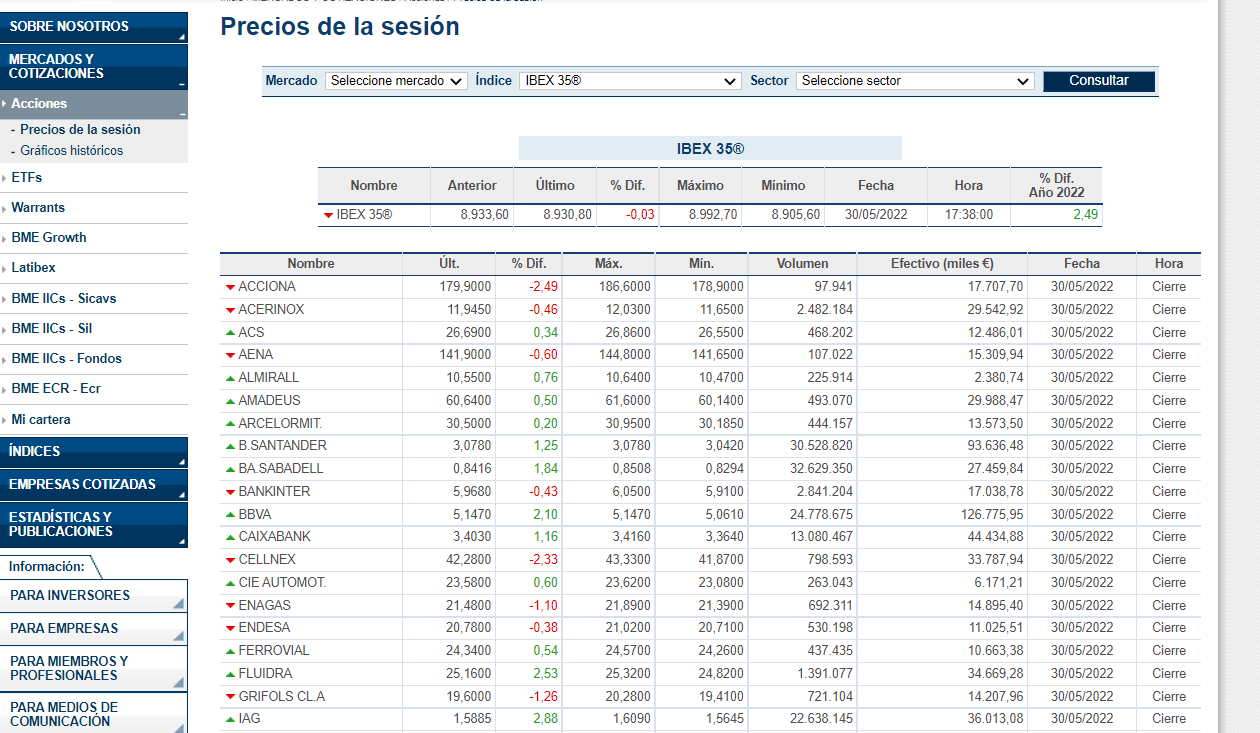

In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create an URL object
url = 'https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000'

# Create object page
page = requests.get(url)
page

<Response [200]>

If the output is Response [200] that means the server allows us to collect data from their website. Now we will use BeautifulSoup to get the text content of the page: 

In [3]:
# parser-lxml = Change html to Python friendly format
soup = BeautifulSoup(page.text, 'lxml')
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head data-analytics-id="UA-35966870-2" data-app-path="/" data-bolsa="BMadrid" data-hora-act="Tue, 31 May 2022 09:14:26 GMT" data-idioma="esp"><meta content="IE=11" http-equiv="X-UA-Compatible"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="Copyright © BME 2022" id="ctl00_copyright" name="copyright"/><title>
	Bolsa de Madrid - Precios de la sesión
</title><link href="/esp/aspx/RSS/RSS.ashx?feed=Todo" id="ctl00_RSSLink1" rel="alternate" title="Bolsa de Madrid: Todos los contenidos agregados" type="application/rss+xml"/><link href="/esp/aspx/RSS/RSS.ashx?feed=NotasPrensa" id="ctl00_RSSLink2" rel="alternate" title="Bolsa de Madrid: Notas de Prensa" type="application/rss+xml"/><link href="/esp/aspx/RSS/RSS.ashx?feed=Regulacion" id="ctl00_RSSLink3" rel="alternate" title="Bolsa de Madrid: Reg

In this output we have all the html info about the page but we are only interested in the table content, we can use the tag < table>  to look for the table, in our case the table name when we inspect the html code is 'ctl00_Contenido_tblAcciones'. 

In [4]:
# Obtain information from tag <table>
table1 = soup.find('table', id= 'ctl00_Contenido_tblAcciones')
table1

<table cellpadding="3" cellspacing="0" class="TblPort" id="ctl00_Contenido_tblAcciones" width="100%">
<tr align="center">
<th scope="col">Nombre</th><th scope="col">Últ.</th><th scope="col">% Dif.</th><th scope="col">Máx.</th><th scope="col">Mín.</th><th scope="col">Volumen</th><th scope="col">Efectivo (miles €)</th><th scope="col">Fecha</th><th class="Ult" scope="col">Hora</th>
</tr><tr align="right">
<td align="left" class="DifFlBj"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0125220311">ACCIONA</a></td><td>179,9000</td><td class="DifClBj">-2,49</td><td>186,6000</td><td>178,9000</td><td>97.941</td><td>17.707,70</td><td align="center">30/05/2022</td><td align="center" class="Ult">Cierre</td>
</tr><tr align="right">
<td align="left" class="DifFlBj"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0132105018">ACERINOX</a></td><td>11,9450</td><td class="DifClBj">-0,46</td><td>12,0300</td><td>11,6500</td><td>2.482.184</td><td>29.542,92</td><td align="center">30/05/2022</td><td al

This output is the table content in html format. To create a DataFrame from this information, we are interested in three types of elements: 

+ < th> : Refers to column names
+ < tr> : Refers to when a new row starts 
+ < td> : Refers to each particular item within the table

First we will obtain the column names from 'th' tag: 

In [5]:
column_names = []

for i in table1.find_all('th'): 
    column_name = i.text
    column_names.append(column_name)
    
print(column_names)

['Nombre', 'Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen', 'Efectivo (miles €)', 'Fecha', 'Hora']


Now we can create a dataframe to store the items of the table: 

In [6]:
# create dataframe with column_names 
stock_prices = pd.DataFrame(columns=column_names)
stock_prices

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora


Now we will use a for loop to iterate through every row (< tr> tag) and get all the items in that row (< td> tags) and store them in the dataframe: 

In [7]:
for j in table1.find_all('tr')[1:]:   # tr -> rows (begins in second row, firts is our columns names)
    row_data = j.find_all('td')       # td -> items in each row 
    row = [i.text for i in row_data]
    length = len(stock_prices)
    #  we fill in each row according to its index 
    stock_prices.loc[length] = row  

In [8]:
stock_prices

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"179,9000","-2,49","186,6000","178,9000",97.941,"17.707,70",30/05/2022,Cierre
1,ACERINOX,"11,9450","-0,46","12,0300","11,6500",2.482.184,"29.542,92",30/05/2022,Cierre
2,ACS,"26,6900","0,34","26,8600","26,5500",468.202,"12.486,01",30/05/2022,Cierre
3,AENA,"141,9000","-0,60","144,8000","141,6500",107.022,"15.309,94",30/05/2022,Cierre
4,ALMIRALL,"10,5500","0,76","10,6400","10,4700",225.914,"2.380,74",30/05/2022,Cierre
5,AMADEUS,"60,6400","0,50","61,6000","60,1400",493.070,"29.988,47",30/05/2022,Cierre
6,ARCELORMIT.,"30,5000","0,20","30,9500","30,1850",444.157,"13.573,50",30/05/2022,Cierre
7,B.SANTANDER,"3,0780","1,25","3,0780","3,0420",30.528.820,"93.636,48",30/05/2022,Cierre
8,BA.SABADELL,"0,8416","1,84","0,8508","0,8294",32.629.350,"27.459,84",30/05/2022,Cierre
9,BANKINTER,"5,9680","-0,43","6,0500","5,9100",2.841.204,"17.038,78",30/05/2022,Cierre


In [9]:
# change dtypes!!
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nombre              35 non-null     object
 1   Últ.                35 non-null     object
 2   % Dif.              35 non-null     object
 3   Máx.                35 non-null     object
 4   Mín.                35 non-null     object
 5   Volumen             35 non-null     object
 6   Efectivo (miles €)  35 non-null     object
 7   Fecha               35 non-null     object
 8   Hora                35 non-null     object
dtypes: object(9)
memory usage: 2.7+ KB


Data types are object (strings), we will change some columns to data type float. 

The format of the numbers is different from the one used by Python, since it uses dots to mark the thousandths and commas to mark the decimals. To solve this we will first remove the dots and then replace the commas with dots to mark the decimals.

In [10]:
stock_prices.replace('\.','', regex=True,inplace=True)
stock_prices.replace('\,','.', regex=True,inplace=True)

In [11]:
stock_prices.head()

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,179.9000,-2.49,186.6000,178.9000,97941,17707.70,30/05/2022,Cierre
1,ACERINOX,11.9450,-0.46,12.0300,11.6500,2482184,29542.92,30/05/2022,Cierre
2,ACS,26.6900,0.34,26.8600,26.5500,468202,12486.01,30/05/2022,Cierre
3,AENA,141.9000,-0.60,144.8000,141.6500,107022,15309.94,30/05/2022,Cierre
4,ALMIRALL,10.5500,0.76,10.6400,10.4700,225914,2380.74,30/05/2022,Cierre


In [12]:
stock_prices.columns

Index(['Nombre', 'Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen',
       'Efectivo (miles €)', 'Fecha', 'Hora'],
      dtype='object')

In [13]:
num_cols = ['Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen',
       'Efectivo (miles €)']

stock_prices[num_cols] = stock_prices[num_cols].astype('float')

In [14]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nombre              35 non-null     object 
 1   Últ.                35 non-null     float64
 2   % Dif.              35 non-null     float64
 3   Máx.                35 non-null     float64
 4   Mín.                35 non-null     float64
 5   Volumen             35 non-null     float64
 6   Efectivo (miles €)  35 non-null     float64
 7   Fecha               35 non-null     object 
 8   Hora                35 non-null     object 
dtypes: float64(6), object(3)
memory usage: 2.7+ KB


In [15]:
# we can store this info to a csv file 
stock_prices.to_csv('Stock_prices_df.csv', index = False)

#### Web scrapping using Selenium

We will use Selenium library to scrap another table from the same page, this time we will scrap 'Resumen de Índices' table: 

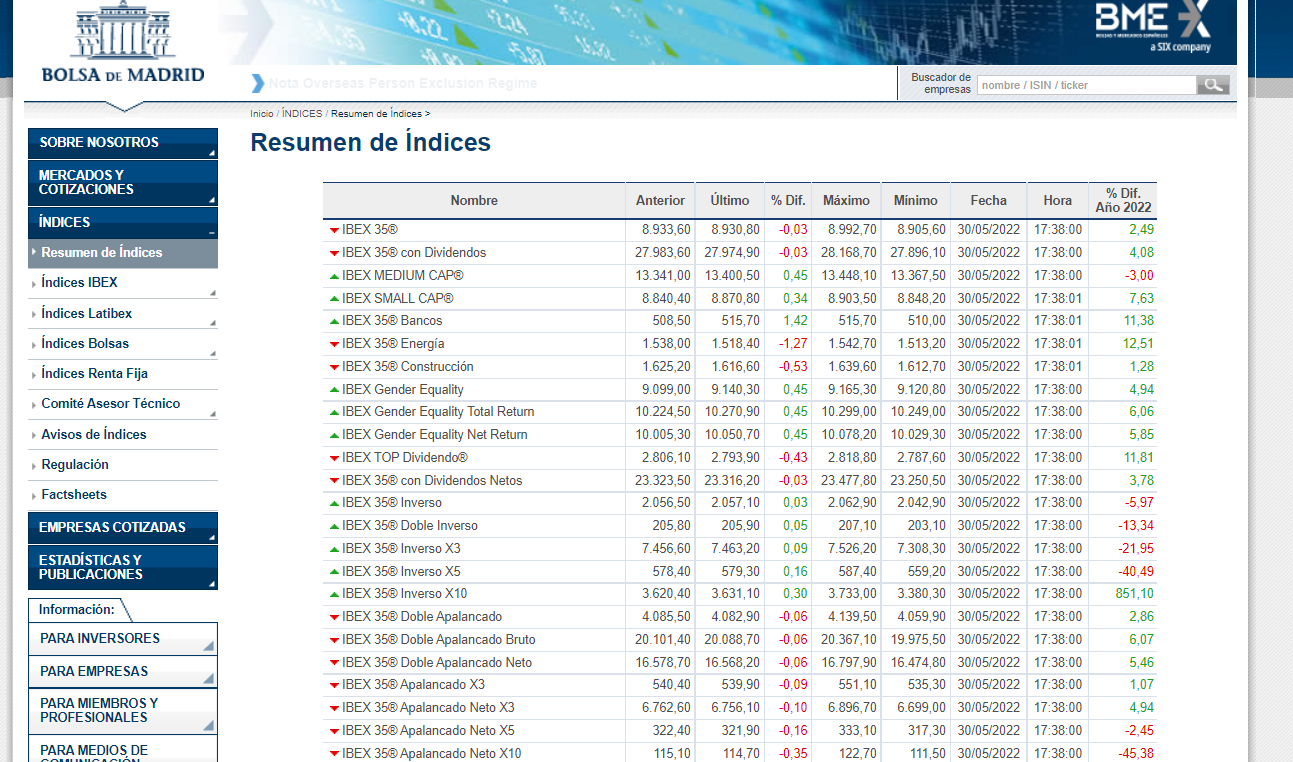

In [16]:
# import libraries 
from selenium import webdriver
from selenium.webdriver.common.by import By

In [17]:
# we will use the dirver to get access to the browser Google Chrome 
driver = webdriver.Chrome()

# url of the page that hosts the table 
url = 'https://www.bolsamadrid.es/esp/aspx/Indices/Resumen.aspx'

# use the dirver to open the url 
driver.get(url)

When inspecting the table we see which is the id of the table : 'ctl00_Contenido_tblÍndices'. We will use it to iterate with a for loop for each row (tag tr) and taking the elements tag td and tag th of each row. 

We search for the elements using XPATH. 

In [18]:
rows = []
for table in driver.find_elements(by= By.XPATH, value = '//*[contains(@id,"ctl00_Contenido_tblÍndices")]//tr'):
        data = [item.text for item in table.find_elements(by= By.XPATH, value= ".//*[self::td or self::th]")]
        # append data by rows 
        rows.append(data)
        
# 1st row is column names 
stock_indices = pd.DataFrame(rows[1:], columns = rows[0])
stock_indices

,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif.\nAño 2022
0,IBEX 35®,"8.933,60","8.930,80","-0,03","8.992,70","8.905,60",30/05/2022,17:38:00,"2,49"
1,IBEX 35® con Dividendos,"27.983,60","27.974,90","-0,03","28.168,70","27.896,10",30/05/2022,17:38:00,"4,08"
2,IBEX MEDIUM CAP®,"13.341,00","13.400,50","0,45","13.448,10","13.367,50",30/05/2022,17:38:00,"-3,00"
3,IBEX SMALL CAP®,"8.840,40","8.870,80","0,34","8.903,50","8.848,20",30/05/2022,17:38:01,"7,63"
4,IBEX 35® Bancos,"508,50","515,70","1,42","515,70","510,00",30/05/2022,17:38:01,"11,38"
...,...,...,...,...,...,...,...,...,...
80,Índice ITX Inverso X3,"265,10","257,60","-2,83","261,80","251,50",30/05/2022,17:38:00,"32,78"
81,Índice TEF Inverso X5,"1.813,40","1.797,90","-0,85","1.920,70","1.761,20",30/05/2022,17:38:01,"-81,23"
82,Índice SAN Inverso X5,"981,10","917,30","-6,50","975,40","917,30",30/05/2022,17:38:01,"-76,62"
83,Índice BBVA Inverso X5,"2.351,60","2.098,50","-10,76","2.299,10","2.098,50",30/05/2022,17:38:00,"-70,21"


In [19]:
# we can close the driver now 
driver.quit()

We will change the data types of the dataframe, since by default all columns are strings: 

In [20]:
stock_indices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nombre           85 non-null     object
 1   Anterior         85 non-null     object
 2   Último           85 non-null     object
 3   % Dif.           85 non-null     object
 4   Máximo           85 non-null     object
 5   Mínimo           85 non-null     object
 6   Fecha            85 non-null     object
 7   Hora             85 non-null     object
 8   % Dif.
Año 2022  85 non-null     object
dtypes: object(9)
memory usage: 6.1+ KB


We notice something strange in last column, pandas does not return its data type, maybe it is because the column name has an 'ñ', we will rename the column: 

In [21]:
stock_indices.rename(columns= {'% Dif.\nAño 2022': '% Dif 2022'}, inplace= True)

In [22]:
stock_indices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Nombre      85 non-null     object
 1   Anterior    85 non-null     object
 2   Último      85 non-null     object
 3   % Dif.      85 non-null     object
 4   Máximo      85 non-null     object
 5   Mínimo      85 non-null     object
 6   Fecha       85 non-null     object
 7   Hora        85 non-null     object
 8   % Dif 2022  85 non-null     object
dtypes: object(9)
memory usage: 6.1+ KB


In [23]:
stock_indices.columns

Index(['Nombre', 'Anterior', 'Último', '% Dif.', 'Máximo', 'Mínimo', 'Fecha',
       'Hora', '% Dif 2022'],
      dtype='object')

In [24]:
# columns we want to convert to floats 
numeric_cols2 = ['Anterior', 'Último', '% Dif.', 'Máximo', 'Mínimo', '% Dif 2022']


We will use the method replace as we did above to change the format: 

In [25]:
stock_indices.replace('\.','', regex=True,inplace=True)
stock_indices.replace('\,','.', regex=True,inplace=True)

In [29]:
# we have one row (25th) with missimg values marked as '-'
#we change '-' char to np.nan to avoid error when changing data type to float  
stock_indices[25:26].replace('-', np.nan, inplace = True)

In [30]:
pd.set_option('display.max_rows', 100)
stock_indices

,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif 2022
0,IBEX 35®,8933.60,8930.80,-0.03,8992.70,8905.60,30/05/2022,17:38:00,2.49
1,IBEX 35® con Dividendos,27983.60,27974.90,-0.03,28168.70,27896.10,30/05/2022,17:38:00,4.08
2,IBEX MEDIUM CAP®,13341.00,13400.50,0.45,13448.10,13367.50,30/05/2022,17:38:00,-3.00
3,IBEX SMALL CAP®,8840.40,8870.80,0.34,8903.50,8848.20,30/05/2022,17:38:01,7.63
4,IBEX 35® Bancos,508.50,515.70,1.42,515.70,510.00,30/05/2022,17:38:01,11.38
5,IBEX 35® Energía,1538.00,1518.40,-1.27,1542.70,1513.20,30/05/2022,17:38:01,12.51
6,IBEX 35® Construcción,1625.20,1616.60,-0.53,1639.60,1612.70,30/05/2022,17:38:01,1.28
7,IBEX Gender Equality,9099.00,9140.30,0.45,9165.30,9120.80,30/05/2022,17:38:00,4.94
8,IBEX Gender Equality Total Return,10224.50,10270.90,0.45,10299.00,10249.00,30/05/2022,17:38:00,6.06
9,IBEX Gender Equality Net Return,10005.30,10050.70,0.45,10078.20,10029.30,30/05/2022,17:38:00,5.85


In [31]:
stock_indices[numeric_cols2] = stock_indices[numeric_cols2].astype('float')

In [32]:
stock_indices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nombre      85 non-null     object 
 1   Anterior    85 non-null     float64
 2   Último      85 non-null     float64
 3   % Dif.      84 non-null     float64
 4   Máximo      85 non-null     float64
 5   Mínimo      85 non-null     float64
 6   Fecha       85 non-null     object 
 7   Hora        85 non-null     object 
 8   % Dif 2022  84 non-null     float64
dtypes: float64(6), object(3)
memory usage: 6.1+ KB


In [33]:
stock_indices.head()

,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif 2022
0,IBEX 35®,8933.6,8930.8,-0.03,8992.7,8905.6,30/05/2022,17:38:00,2.49
1,IBEX 35® con Dividendos,27983.6,27974.9,-0.03,28168.7,27896.1,30/05/2022,17:38:00,4.08
2,IBEX MEDIUM CAP®,13341.0,13400.5,0.45,13448.1,13367.5,30/05/2022,17:38:00,-3.00
3,IBEX SMALL CAP®,8840.4,8870.8,0.34,8903.5,8848.2,30/05/2022,17:38:01,7.63
4,IBEX 35® Bancos,508.5,515.7,1.42,515.7,510.0,30/05/2022,17:38:01,11.38


In [36]:
# save dataframe to csv format 
stock_indices.to_csv('stock_indices_df.csv', index = False)

### Nivell 2

### - Exercici 2

Documenta en un word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.



We have generated 2 files: stock_prices and stock_indices.

#### Stock Prices file report

We are going gto generate a Profile Report to attach to the word file using pandas_profiling library. 

In [37]:
# open stock_prices df: 
stock = pd.read_csv('Stock_prices_df.csv')
stock.head()

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,179.900,-2.49,186.60,178.90,97941.0,17707.70,30/05/2022,Cierre
1,ACERINOX,11.945,-0.46,12.03,11.65,2482184.0,29542.92,30/05/2022,Cierre
2,ACS,26.690,0.34,26.86,26.55,468202.0,12486.01,30/05/2022,Cierre
3,AENA,141.900,-0.60,144.80,141.65,107022.0,15309.94,30/05/2022,Cierre
4,ALMIRALL,10.550,0.76,10.64,10.47,225914.0,2380.74,30/05/2022,Cierre


In [38]:
stock.columns

Index(['Nombre', 'Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen',
       'Efectivo (miles €)', 'Fecha', 'Hora'],
      dtype='object')

**Information about the dataset** : This dataset is composed of information on the share prices of companies belonging to the IBEX 35 on 30/05/2022. 

**Information about each column:**

+ Nombre: Name of the Company. 
+ Últ.: Current share price (in €). 
+ % Dif: Percentage difference with respect to the opening price.
+ Máx. : Maximum value of the price in the current session. 
+ Mín. : Minimum value of the price in the current session. 
+ Volumen : Number of transactions of the asset carried out until the close of the trading session. 
+ Efectivo (miles €) : Transactions carried out up to the close of the trading session, expressed in thousands of euros. 
+ Fecha : Date of the session. 
+ Hora : Time of of the day. If 'Cierre' means the session is closed. 

In [42]:
from pandas_profiling import ProfileReport

# generate profile report 
stock_profile = ProfileReport(stock, title = 'IBEX 35 Stock Exchange. Session prices (30/05/2022)', 
     dataset= {'description': 'This dataset is composed of information on the share prices of companies belonging to the IBEX 35 on 30/05/2022.', 
              'url': 'https://www.bolsamadrid.es/esp/aspx/Portada/Portada.aspx'}, 
     variables = {'descriptions': {
         'Nombre' : 'Name of the Company', 
         'Últ.' : 'Current share price (in €)', 
         '% Dif.': 'Percentage difference with respect to the opening price', 
         'Máx.' : 'Maximum value of the price in the current session', 
         'Mín.': 'Minimum value of the price in the current session', 
         'Volumen': 'Number of transactions of the asset carried out until the close of the trading session', 
         'Efectivo (miles €)': 'Transactions carried out up to the close of the trading session, expressed in thousands of euros', 
         'Fecha' : 'Date of the session', 
         'Hora': 'Time of of day. If "Cierre" means the session is closed.'
         
     } })

stock_profile.to_file('IBEX35_Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

This generates a report in HTML format, the **description of the variables is available by clicking on the 'Variables' tab** in the 'Overview' section, and the description of the dataset is inside the 'Dataset' tab. 

A preview of the Report generated: 

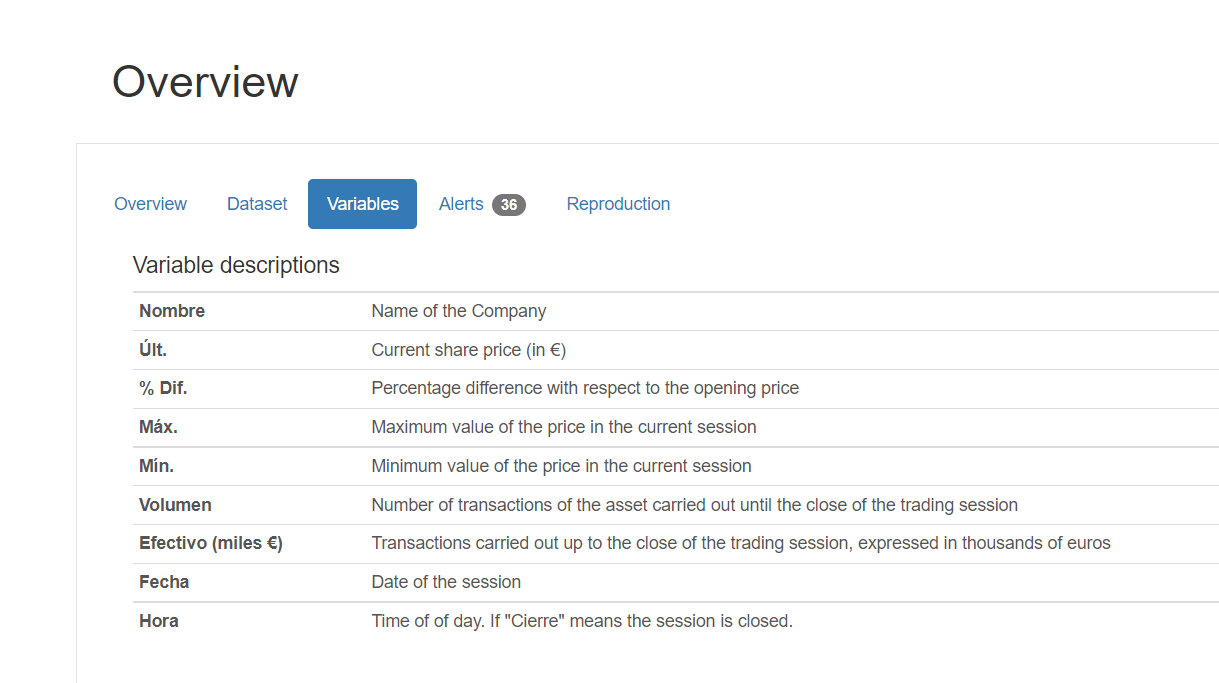

This HTML report can be opened from the following link: 


https://elenaml81.github.io/Web_Scrapping/IBEX35_Report.html

#### Stock indices file report

We will use the same library as before to do a report of our stock indices table that we have generated with Selenium. 

In [2]:
# open csv
stock_indices = pd.read_csv('stock_indices_df.csv')
stock_indices.head()

,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif 2022
0,IBEX 35®,8933.6,8930.8,-0.03,8992.7,8905.6,30/05/2022,17:38:00,2.49
1,IBEX 35® con Dividendos,27983.6,27974.9,-0.03,28168.7,27896.1,30/05/2022,17:38:00,4.08
2,IBEX MEDIUM CAP®,13341.0,13400.5,0.45,13448.1,13367.5,30/05/2022,17:38:00,-3.00
3,IBEX SMALL CAP®,8840.4,8870.8,0.34,8903.5,8848.2,30/05/2022,17:38:01,7.63
4,IBEX 35® Bancos,508.5,515.7,1.42,515.7,510.0,30/05/2022,17:38:01,11.38


In [4]:
stock_indices.columns

Index(['Nombre', 'Anterior', 'Último', '% Dif.', 'Máximo', 'Mínimo', 'Fecha',
       'Hora', '% Dif 2022'],
      dtype='object')

**Information about the dataset:** This dataset contains information on the different indexes of the different stock markets that constitute the Spanish stock market. 

**Information about each column:**

+ **Nombre** : name of the stock index
+ **Anterior** : closing volume in the previous day's session
+ **Último** : index volume at the time of table creation
+ **% Dif.**: precentual difference of the current volume with respect to the column 'Anterior'
+ **Máximo** : maximum value of the stock market in the current session 
+ **Mínimo** : minimum value of the stock market in the current session 
+ **Fecha** : Date of the session
+ **% Dif 2022** : difference with respect to the year 2022 


In [6]:
from pandas_profiling import ProfileReport

# generate profile report 
indices_profile = ProfileReport(stock_indices, 
                  title = 'Information on the volume of the different indexes of the Spanish stock market (05/30/2022)', 
                  dataset = {'description' : 'This dataset contains information on the different indexes of the different stock markets that constitute the Spanish stock market.', 
                            'url': 'https://www.bolsamadrid.es/esp/aspx/Indices/Resumen.aspx'}, 
                  variables = {'descriptions': {
                      'Nombre' : 'name of the stock index', 
                      'Anterior' : 'closing volume in the previous day session', 
                      'Último' : 'index volume at the time of table creation', 
                      '% Dif.' : 'precentual difference of the current volume with respect to the column "Anterior"', 
                      'Máximo' : 'maximum value of the stock market in the current session', 
                      'Mínimo' : 'minimum value of the stock market in the current session', 
                      'Fecha' : 'Date of the session', 
                      '% Dif 2022' : 'difference  with respect to the year 2022'
                  }})
#generate html 
indices_profile.to_file('Stock Indices Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

As before, we have generated an html file, is posted in the following link: 

https://elenaml81.github.io/Web_Scrapping/Stock_Indices_Report.html

### Nivell 3

### - Exercici 3

Tria una página web que tu vulguis i realitza web scraping mitjançant la llibreria Scrapy. 



I want to buy a new acoustic guitar, so I will do web scraping of a web page to consult brand, model, price and characteristics of all the acoustic guitars between 1000 and 2500 €. The site is a well known store that sells musical instruments online: https://www.thomann.de/es/index.html

This is a screenshot of the page that we are going to scrap: 

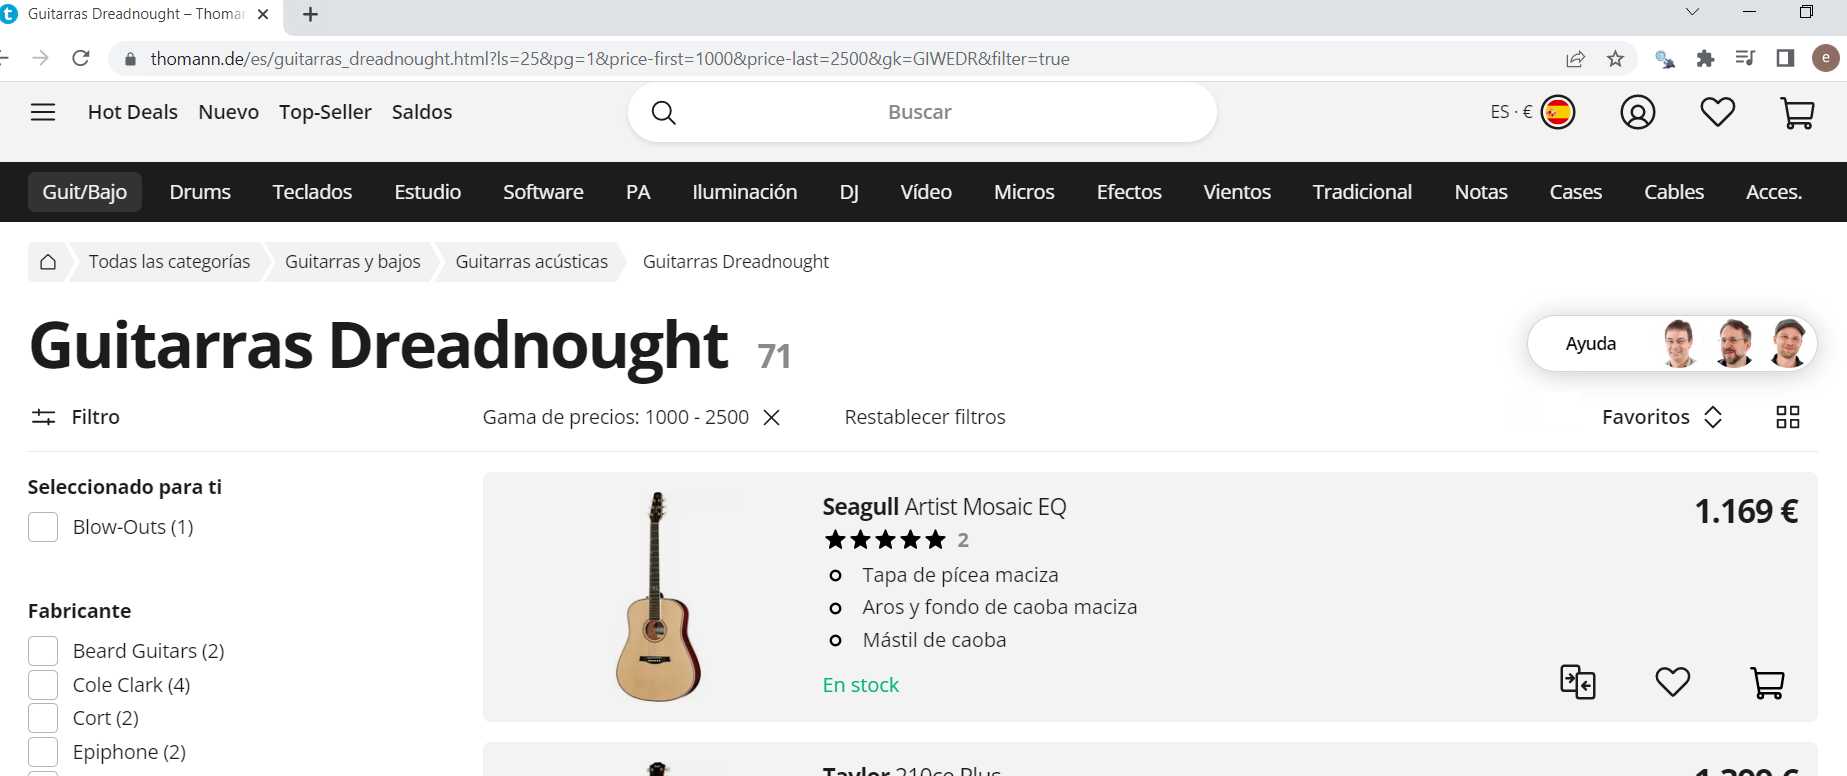

Now we use the code to extract the information using Scrapy. We will locate the elements of the page using the CSS path: 

In [1]:
import scrapy
from scrapy.crawler import CrawlerProcess

In [2]:
import json

# define class to save results as json file 
class JsonWriterPipeline(object):

    def open_spider(self, spider):
        self.file = open('guitar_result.jl', 'w')

    def close_spider(self, spider):
        self.file.close()

    def process_item(self, item, spider):
        line = json.dumps(dict(item)) + "\n"
        self.file.write(line)
        return item
    
    
import logging


# construct the spider to get the info we want 
class GuitarSpider(scrapy.Spider):
    name = "guitars"
    start_urls = [
        'https://www.thomann.de/es/guitarras_dreadnought.html?ls=25&pg=1&price-first=1000&price-last=2500&gk=GIWEDR&filter=true',
        'https://www.thomann.de/es/guitarras_dreadnought.html?ls=25&pg=2&price-first=1000&price-last=2500&gk=GIWEDR&filter=true',
        'https://www.thomann.de/es/guitarras_dreadnought.html?ls=25&pg=3&price-first=1000&price-last=2500&gk=GIWEDR&filter=true'
    ]
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'ITEM_PIPELINES': {'__main__.JsonWriterPipeline': 1}, # Used for pipeline 1
        'FEED_FORMAT':'json',                                 # Used for pipeline 2
        'FEED_URI': 'guitar_result.json'                       # Used for pipeline 2
    }
    
    def parse(self, response):
        for guitar in response.css('div.fx-product-list-entry'):
            yield {
                'Brand': guitar.css('span.title__manufacturer::text').extract_first(),
                'Model': guitar.css('span.title__name::text').extract_first(),
                'Price': guitar.css('span.fx-typography-price-primary.fx-price-group__primary.product__price-primary::text').extract_first(),
                'Description_1': guitar.css('li.fx-list__item--circle:nth-child(1)::text').extract_first(), 
                'Description_2': guitar.css('li.fx-list__item--circle:nth-child(2)::text').extract_first(), 
                'Description_3': guitar.css('li.fx-list__item--circle:nth-child(3)::text').extract_first(), 
            }

process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36'
})

process.crawl(GuitarSpider)
process.start()

2022-06-03 22:03:41 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: scrapybot)
2022-06-03 22:03:41 [scrapy.utils.log] INFO: Versions: lxml 4.7.1.0, libxml2 2.9.12, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.4.0, Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 21.0.0 (OpenSSL 1.1.1o  3 May 2022), cryptography 3.4.8, Platform Windows-10-10.0.19044-SP0
2022-06-03 22:03:41 [scrapy.crawler] INFO: Overridden settings:
{'LOG_LEVEL': 30,
 'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
               '(KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36'}
2022-06-03 22:03:41 [py.warnings] WARNING: C:\Users\eelee\anaconda3\lib\site-packages\scrapy\extensions\feedexport.py:289: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)



In [3]:
import pandas as pd
# we can open the json file to a dataframe 
guitars_df = pd.read_json('guitar_result.jl', lines=True)
guitars_df.head()

,Brand,Model,Price,Description_1,Description_2,Description_3
0,Gibson,Hummingbird Studio Walnut AN,1.939 €\n,Fabricada en Estados Unidos,Hombros cuadrados,Tapa de pícea de Sitka maciza
1,Gibson,J-45 Standard VS LH,2.390 €\n,Para zurdos,Estilo de hombros redondeados,Tapa de pícea maciza
2,Cort,Flow OC Natural Satin,1.144 €\n,Cuerpo Orchestra con cutaway,Tapa de cedro rojo macizo,Aros y fondo de caoba maciza
3,Maton,SRS60C w/ Case,1.869 €\n,Dreadnought,Con cutaway veneciano,Tapa de pícea de Sitka maciza
4,LAG,THV20DCE Tramontane Hy B-Stock,1.059 €\n,Con cutaway,Tapa de pícea de Engelman maciza,Aros y fondo de ovangkol


In [4]:
# inspect the df 
guitars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          71 non-null     object
 1   Model          71 non-null     object
 2   Price          71 non-null     object
 3   Description_1  71 non-null     object
 4   Description_2  71 non-null     object
 5   Description_3  71 non-null     object
dtypes: object(6)
memory usage: 3.5+ KB


From our 'Price' column, we will extract the price info and convert it to int (all prices are integer numbers, there is not any float number): 

In [5]:
guitars_df['Price'] = guitars_df['Price'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [6]:
guitars_df.head()

,Brand,Model,Price,Description_1,Description_2,Description_3
0,Gibson,Hummingbird Studio Walnut AN,1939,Fabricada en Estados Unidos,Hombros cuadrados,Tapa de pícea de Sitka maciza
1,Gibson,J-45 Standard VS LH,2390,Para zurdos,Estilo de hombros redondeados,Tapa de pícea maciza
2,Cort,Flow OC Natural Satin,1144,Cuerpo Orchestra con cutaway,Tapa de cedro rojo macizo,Aros y fondo de caoba maciza
3,Maton,SRS60C w/ Case,1869,Dreadnought,Con cutaway veneciano,Tapa de pícea de Sitka maciza
4,LAG,THV20DCE Tramontane Hy B-Stock,1059,Con cutaway,Tapa de pícea de Engelman maciza,Aros y fondo de ovangkol


In [7]:
guitars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          71 non-null     object
 1   Model          71 non-null     object
 2   Price          71 non-null     int32 
 3   Description_1  71 non-null     object
 4   Description_2  71 non-null     object
 5   Description_3  71 non-null     object
dtypes: int32(1), object(5)
memory usage: 3.2+ KB


Now we have our info in the correct format. We check that we have 71 guitars, the same result we see in the screenshot we have made of the page.